In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [4]:
from sklearn.datasets import load_breast_cancer

In [7]:
data = load_breast_cancer()

In [8]:
type(data)

sklearn.utils.Bunch

In [9]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
data.data.shape

(569, 30)

In [13]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [14]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size = 0.33,random_state=0)

In [31]:
N,D = X_train.shape

In [32]:
N

381

In [33]:
D

30

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [35]:
# Way -1 :
# model = tf.keras.models.Sequential([
#         tf.keras.layers.Input(shape=(D, )),
#         tf.keras.layers.Dense(1,activation='sigmoid')
# ])

# Way-2 :
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation='sigmoid'))

In [36]:
# Compiler ():
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [37]:
r = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100)
# Evaluate the model
print("Train score:",model.evaluate(X_train,y_train))
print("Test score:",model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 0s 10ms/step - loss: 0.5273 - accuracy: 0.7507 - val_loss: 0.4783 - val_accuracy: 0.7872
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.4742 - accuracy: 0.7795 - val_loss: 0.4359 - val_accuracy: 0.8138
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.8031 - val_loss: 0.3993 - val_accuracy: 0.8457
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8425 - val_loss: 0.3688 - val_accuracy: 0.8511
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8661 - val_loss: 0.3434 - val_accuracy: 0.8936
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8714 - val_loss: 0.3217 - val_accuracy: 0.9096
Epoch 7/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8898 - val_loss: 0.3033 - val_accuracy: 0.9149
Epoch 8/100


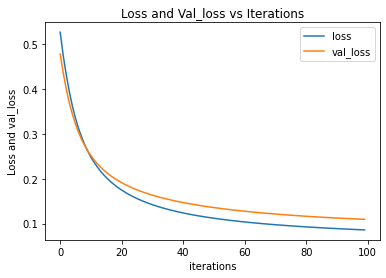

In [38]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.title("Loss and Val_loss vs Iterations")
plt.xlabel('iterations')
plt.ylabel('Loss and val_loss')
plt.legend();

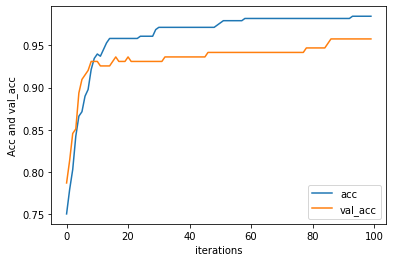

In [39]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.xlabel('iterations')
plt.ylabel('Acc and val_acc')
plt.legend();

In [40]:
# Making Predictions
y_pred = model.predict(X_test)
print(y_pred)

[[3.0089915e-02]
 [9.2695343e-01]
 [9.9459314e-01]
 [9.7971350e-01]
 [9.9596822e-01]
 [9.7438753e-01]
 [9.9518681e-01]
 [9.9472296e-01]
 [9.9984264e-01]
 [9.9968654e-01]
 [3.6259544e-01]
 [7.4853140e-01]
 [9.9972260e-01]
 [3.3058822e-01]
 [3.1520349e-01]
 [3.5458744e-02]
 [9.7154397e-01]
 [1.1649236e-04]
 [5.2055717e-04]
 [1.2438945e-06]
 [2.4567038e-02]
 [3.3302009e-02]
 [9.5231974e-01]
 [9.9147606e-01]
 [5.3107142e-03]
 [9.9525487e-01]
 [9.9965984e-01]
 [1.9448876e-02]
 [9.9251258e-01]
 [4.1389652e-05]
 [9.9948478e-01]
 [2.3508370e-03]
 [7.1015757e-01]
 [1.5115589e-02]
 [9.9994111e-01]
 [1.6150296e-02]
 [9.6497142e-01]
 [2.7609766e-03]
 [9.5514798e-01]
 [6.1520338e-03]
 [1.3977075e-01]
 [9.9939173e-01]
 [2.3010561e-01]
 [9.9945152e-01]
 [6.2096465e-01]
 [9.7138548e-07]
 [9.9997640e-01]
 [9.3645382e-01]
 [9.9143761e-01]
 [1.2136698e-03]
 [5.0245449e-06]
 [5.5990398e-02]
 [8.9702010e-04]
 [9.9309409e-01]
 [9.7918940e-01]
 [9.9800193e-01]
 [9.9741769e-01]
 [9.6295094e-01]
 [9.8838651e-0